# Non-linear Programming
### Unconstrained Multivariate Optimization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian, hessian

### Newton Raphson method 

### Newton Raphson method for Sphere (p1)

In [11]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    return x

n = 30
def func(x):
    return sum(x[i] ** 2 for i in range(1,n))

initial_guess = ([100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,
                 100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,
                 100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,])
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)


Hessian is singular. No solution found.
Minimum found: None


Iteration 1: x = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Iteration 2: x = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
The minimum was found to be at [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] after 2 iterations


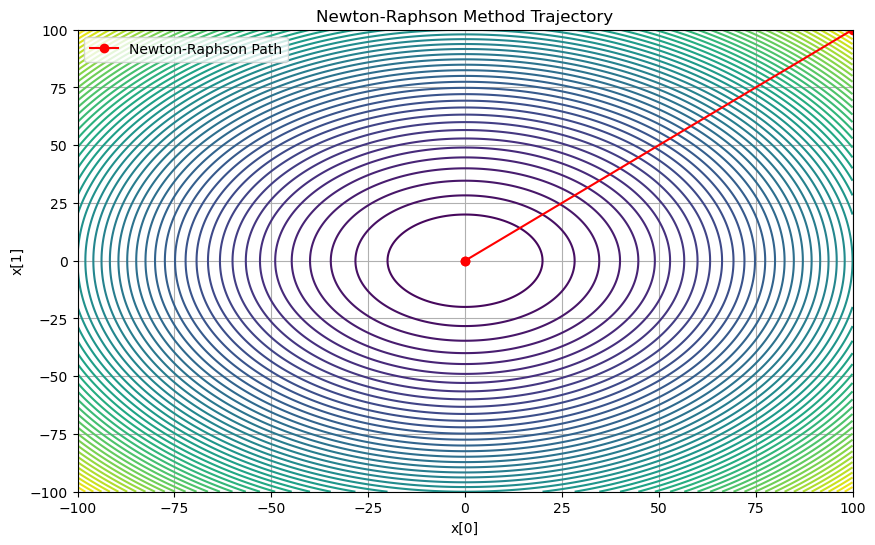

In [6]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    trajectory = [x.copy()]
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        trajectory.append(x.copy())
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    return np.array(trajectory)

n = 30
def func(x):
    return sum(x[i] ** 2 for i in range(n))

initial_guess = [100.0] * n
iterations = 10

trajectory = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)

# Plotting the trajectory
trajectory = np.array(trajectory)
plt.figure(figsize=(10, 6))

# Creating a meshgrid for plotting the function
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Plotting the path taken by the algorithm
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Newton-Raphson Path')

plt.title('Newton-Raphson Method Trajectory')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.legend()
plt.grid()
plt.show()

Iteration 1: x = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Iteration 2: x = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
The minimum was found to be at [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] after 2 iterations


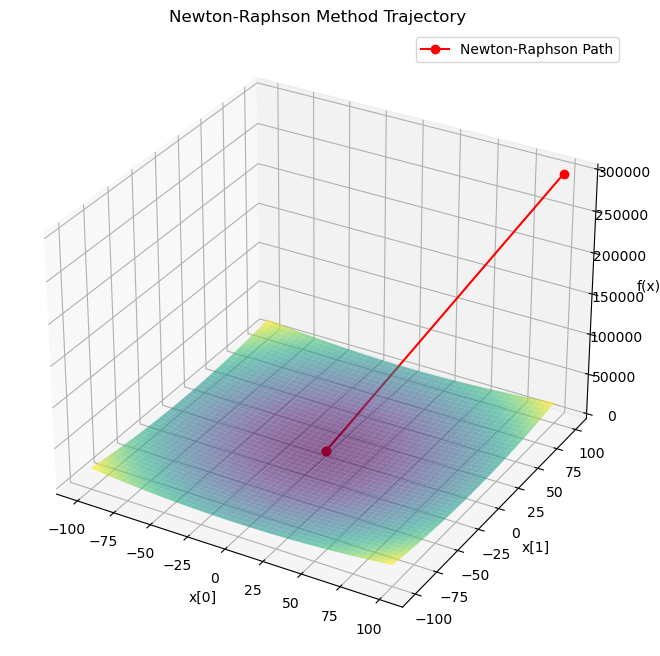

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from autograd import grad, hessian
from mpl_toolkits.mplot3d import Axes3D

def NewtonRaphson(func, x0, n, step_length=1.0):
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    trajectory = [x.copy()]
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        trajectory.append(x.copy())
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    return np.array(trajectory)

n = 30
def func(x):
    return sum(x[i] ** 2 for i in range(n))

initial_guess = [100.0] * n
iterations = 10

trajectory = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)

# Plotting the trajectory in 3D
trajectory = np.array(trajectory)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating a meshgrid for plotting the function
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.plot(trajectory[:, 0], trajectory[:, 1], func(trajectory.T), 'ro-', label='Newton-Raphson Path')

ax.set_title('Newton-Raphson Method Trajectory')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('f(x)')

plt.legend()
plt.show()

### Newton Raphson method for Schwefel1.3 (p3)

In [13]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    func_min = func(x) 
    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    print(f"The function value at the minimum point is {func_min}")
    return x

def func(X):
    
    total_sum = 0
    n = len(X)
    
    for l in range(1, n + 1):
        prefix_sum = sum(X[:l])
        total_sum += prefix_sum ** 2
    
    return total_sum

initial_guess = ([100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,
                 100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,
                 100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,])
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)


Iteration 1: x = [-2.84785528e-11  1.45519152e-11 -3.14912540e-11  1.16529009e-12
  3.97903932e-12 -2.04209982e-11  1.66124892e-11  1.89999128e-11
 -5.92592642e-12 -1.51203494e-11 -1.25623956e-11  3.11359827e-11
 -5.31485966e-12  2.94164693e-12 -5.25801624e-12  1.30739863e-12
  3.31823458e-11 -2.57358579e-11  1.22355459e-11 -1.34008360e-11
 -4.81747975e-12  1.73372428e-11 -2.55226951e-11  1.84741111e-11
 -9.52127266e-13 -9.74864633e-12  2.68585154e-12 -5.45696821e-12
  0.00000000e+00  3.83693077e-13]
Iteration 2: x = [ 4.07127958e-25 -8.27180613e-25  6.46234854e-25  3.99655867e-25
 -4.61250127e-25  6.91471293e-25 -4.39439700e-25 -2.61725116e-25
 -1.34901526e-25  6.26847808e-25  3.89356499e-25 -8.53030007e-25
  6.84201151e-25 -2.41934173e-25 -8.88572924e-27 -4.72559237e-26
 -2.58493941e-25  6.13923111e-26 -2.82727748e-25  5.02447599e-25
 -1.48634016e-25  7.10858339e-26 -4.20052655e-26 -1.64789888e-25
 -4.01877300e-26  8.88572924e-26  7.10858339e-26 -1.29246971e-26
  1.29246971e-26  2.53

### Newton Raphson method for Rosenkbrok (p5)

In [15]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    func_min = func(x)  # Evaluate the function at the minimum point
    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    print(f"The function value at the minimum point is {func_min}")
    return x

def func(X):
    
    total_sum = 0
    n = len(X)
    for i in range(n - 1):
        term1 = 100 * (X[i + 1] - X[i]**2)**2
        term2 = (X[i] - 1)**2
        total_sum += term1 + term2
    
    return total_sum

initial_guess = ([30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,
                 30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,
                 30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,])
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)

Iteration 1: x = [ 20.11421031  20.16790326  20.16850652  20.16851329  20.16851337
  20.16851337  20.16851337  20.16851337  20.16851337  20.16851337
  20.16851337  20.16851337  20.16851337  20.16851337  20.16851337
  20.16851337  20.16851337  20.16851337  20.16851337  20.16851337
  20.16851337  20.16851337  20.16851337  20.16851337  20.16851353
  20.16852755  20.16977519  20.28082182  30.16459372 909.87562308]
Iteration 2: x = [1.35255464e+01 1.36135076e+01 1.36150850e+01 1.36151126e+01
 1.36151131e+01 1.36151131e+01 1.36151131e+01 1.36151131e+01
 1.36151131e+01 1.36151131e+01 1.36151131e+01 1.36151131e+01
 1.36151131e+01 1.36151131e+01 1.36151131e+01 1.36151131e+01
 1.36151131e+01 1.36151131e+01 1.36151131e+01 1.36151131e+01
 1.36151131e+01 1.36151131e+01 1.36151131e+01 1.36151135e+01
 1.36151403e+01 1.36167334e+01 1.37114026e+01 1.93327896e+01
 3.51915657e+02 2.03208829e+04]
Iteration 3: x = [9.13589863e+00 9.24445398e+00 9.24748338e+00 9.24756464e+00
 9.24756676e+00 9.24756682e+00 9

### Newton Raphson method for Schwefel2.26 (p8)

In [18]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    func_min = func(x)  # Evaluate the function at the minimum point
    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    print(f"The function value at the minimum point is {func_min}")
    return x

def func(X):
    n=30
    total_sum = 0
    for i in range(1, n):
        total_sum -= X[i] * au.sin(au.sqrt(au.abs(X[i])))
    return total_sum

initial_guess = ([500.0]*30)
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)

Hessian is singular. No solution found.
Minimum found: None


### Newton Raphson method for Rastrigin (p9)

In [19]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    func_min = func(x)  # Evaluate the function at the minimum point
    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    print(f"The function value at the minimum point is {func_min}")
    return x

import autograd.numpy
def func(X):
    n = len(X)
    total_sum = 0
    for xi in X:
        total_sum += xi**2 - 10 * au.cos(2 * au.pi * xi) + 10
    return total_sum

initial_guess = ([5.12]*30)
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)

Iteration 1: x = [4.93623855 4.93623855 4.93623855 4.93623855 4.93623855 4.93623855
 4.93623855 4.93623855 4.93623855 4.93623855 4.93623855 4.93623855
 4.93623855 4.93623855 4.93623855 4.93623855 4.93623855 4.93623855
 4.93623855 4.93623855 4.93623855 4.93623855 4.93623855 4.93623855
 4.93623855 4.93623855 4.93623855 4.93623855 4.93623855 4.93623855]
Iteration 2: x = [4.97626755 4.97626755 4.97626755 4.97626755 4.97626755 4.97626755
 4.97626755 4.97626755 4.97626755 4.97626755 4.97626755 4.97626755
 4.97626755 4.97626755 4.97626755 4.97626755 4.97626755 4.97626755
 4.97626755 4.97626755 4.97626755 4.97626755 4.97626755 4.97626755
 4.97626755 4.97626755 4.97626755 4.97626755 4.97626755 4.97626755]
Iteration 3: x = [4.97469258 4.97469258 4.97469258 4.97469258 4.97469258 4.97469258
 4.97469258 4.97469258 4.97469258 4.97469258 4.97469258 4.97469258
 4.97469258 4.97469258 4.97469258 4.97469258 4.97469258 4.97469258
 4.97469258 4.97469258 4.97469258 4.97469258 4.97469258 4.97469258
 4.974692

### Newton Raphson method for Ackley (p10)

In [22]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    func_min = func(x)  # Evaluate the function at the minimum point
    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    print(f"The function value at the minimum point is {func_min}")
    return x

def func(X):
    n = len(X)
    sum1 = -20 * au.exp(-0.2 * au.sqrt(au.sum(X**2))/n)
    sum2 = -au.exp(au.sum(au.cos(2 * au.pi * X))/n)
    return sum1 + sum2 + 20 + au.exp(1)

initial_guess = ([32.0]*30)
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)

Iteration 1: x = [31.99788448 31.99788448 31.99788448 31.99788448 31.99788448 31.99788448
 31.99788448 31.99788448 31.99788448 31.99788448 31.99788448 31.99788448
 31.99788448 31.99788448 31.99788448 31.99788448 31.99788448 31.99788448
 31.99788448 31.99788448 31.99788448 31.99788448 31.99788448 31.99788448
 31.99788448 31.99788448 31.99788448 31.99788448 31.99788448 31.99788448]
Iteration 2: x = [31.99788423 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423
 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423
 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423
 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423
 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423]
Iteration 3: x = [31.99788423 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423
 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423
 31.99788423 31.99788423 31.99788423 31.99788423 31.99788423 31.9978842

### Newton Raphson method for Griewank (p11)

In [30]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    func_min = func(x)  # Evaluate the function at the minimum point
    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    print(f"The function value at the minimum point is {func_min}")
    return x

def u(x, a, k, m):
    if x > a:
        return k * (x - a) ** m
    elif -a <= x <= a:
        return 0
    else:
        return k * (-x - a) ** m

def f(X):
    n = len(X)
    sum1 = 0
    for i in range(n):
        sum1 += 10 * np.sin(np.pi * X[0])**2
        if i < n - 1:
            sum1 += (X[i] - 1)**2 * (1 + 10 * np.sin(np.pi * X[i + 1])**2)
        else:
            sum1 += (X[i] - 1)**2
    sum2 = 0
    for i in range(n):
        sum2 += u(X[i], 10, 100, 4)
    return sum1 + sum2

initial_guess = ([1.0]*30)
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)

Iteration 1: x = [0.99343717 0.99343717 0.99343717 0.99343717 0.99343717 0.99343717
 0.99343717 0.99343717 0.99343717 0.99343717 0.99343717 0.99343717
 0.99343717 0.99343717 0.99343717 0.99343717 0.99343717 0.99343717
 0.99343717 0.99343717 0.99343717 0.99343717 0.99343717 0.99343717
 0.99343717 0.99343717 0.99343717 0.99343717 0.99343717 0.99343717]
Iteration 2: x = [0.99342971 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971
 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971
 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971
 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971
 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971]
Iteration 3: x = [0.99342971 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971
 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971
 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971
 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971 0.99342971
 0.993429

### Newton Raphson method for Six-Hump-Camel-Back (p16)

In [47]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    func_min = func(x)  # Evaluate the function at the minimum point
    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    print(f"The function value at the minimum point is {func_min}")
    return x


def func(x): # Objective function
    return  (4 * x[0]**2 - 2.1 * x[0]**4 + (1/3) * x[0]**6 + x[0] * x[1] - 4 * x[1]**2 + 4 * x[1]**4)

initial_guess = ([0.0,7.0])
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)

Iteration 1: x = [-0.58535545  4.68284358]
Iteration 2: x = [-0.60548033  3.14638434]
Iteration 3: x = [9.13737722 2.1139499 ]
Iteration 4: x = [7.34692771 1.42831901]
Iteration 5: x = [5.92377409 0.97104988]
Iteration 6: x = [4.79671335 0.65762447]
Iteration 7: x = [3.90931367 0.40690937]
Iteration 8: x = [ 3.20693176 20.06083163]
Iteration 9: x = [ 2.66091005 13.37929095]
Iteration 10: x = [2.24159134 8.92757862]
The minimum was found to be at [2.24159134 8.92757862] after 10 iterations
The function value at the minimum point is 25119.99007006856
Minimum found: [2.24159134 8.92757862]


### Newton Raphson method for Branin (p17)

In [48]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    func_min = func(x)  # Evaluate the function at the minimum point
    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    print(f"The function value at the minimum point is {func_min}")
    return x


def func(x): # Objective function 
    return (x[1] - (5.1/(4*au.pi**2))*x[0]**2 + (5/au.pi)*x[0] - 6)**2 + 10*(1 - 1/(8*au.pi))*au.cos(x[0]) + 10

initial_guess = ([0.0,16.0])
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)

Iteration 1: x = [-4.25449315e-17  6.00000000e+00]
Iteration 2: x = [0. 6.]
The minimum was found to be at [0. 6.] after 2 iterations
The function value at the minimum point is 19.602112642270264
Minimum found: [0. 6.]


### Newton Raphson method for Goldstein-Price (p18)

In [46]:
def NewtonRaphson(func, x0, n, step_length=1.0):
    
    x = np.array(x0, dtype=float)
    grad_f = grad(func)
    hess_f = hessian(func)
    
    for iteration in range(n):
        grad_fx = grad_f(x)
        hess_fx = hess_f(x)
        
        if np.linalg.det(hess_fx) == 0:
            print("Hessian is singular. No solution found.")
            return None
        
        hess_fx_inv = np.linalg.inv(hess_fx)  
        delta_x = -hess_fx_inv @ grad_fx  
        x = x + step_length * delta_x 
        
        print(f"Iteration {iteration + 1}: x = {x}")

        if np.linalg.norm(step_length * delta_x) < 1e-6:  
            break

    func_min = func(x)  # Evaluate the function at the minimum point
    print(f"The minimum was found to be at {x} after {iteration + 1} iterations")
    print(f"The function value at the minimum point is {func_min}")
    return x

def func(x): # Objective function
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2))*(30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

initial_guess = [-1.0,3.0]
iterations = 10

minimum = NewtonRaphson(func, initial_guess, iterations, step_length=1.0)
print("Minimum found:", minimum)

Iteration 1: x = [-0.18590308  2.18590308]
Iteration 2: x = [0.35298991 1.64701009]
Iteration 3: x = [0.70674627 1.29325373]
Iteration 4: x = [0.93482098 1.06517902]
Iteration 5: x = [1.07613223 0.92386777]
Iteration 6: x = [1.15586259 0.84413741]
Iteration 7: x = [1.19119199 0.80880801]
Iteration 8: x = [1.19952778 0.80047222]
Iteration 9: x = [1.19999852 0.80000148]
Iteration 10: x = [1.2 0.8]
The minimum was found to be at [1.2 0.8] after 10 iterations
The function value at the minimum point is 840.0000000000003
Minimum found: [1.2 0.8]


### Golden Section Explanation

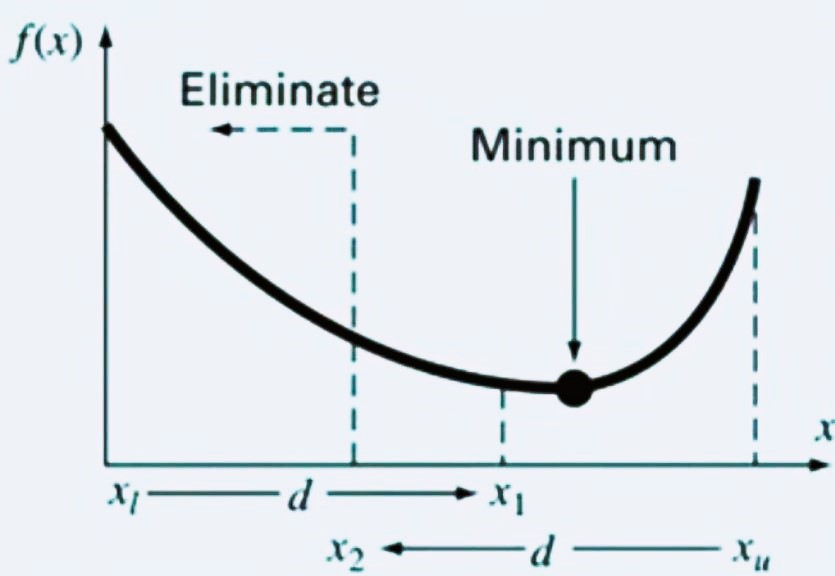

### Rank One Method + Golden Section Search for Six-Hump Camel-Back (p16)

In [4]:
def func(x): # Objective function
    return  (4 * x[0]**2 - 2.1 * x[0]**4 + (1/3) * x[0]**6 + x[0] * x[1] - 4 * x[1]**2 + 4 * x[1]**4)

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T # Transpose of w
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) # Outer product between w and the transpose of w
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])

### Plot Six-Hump Camel-Back 

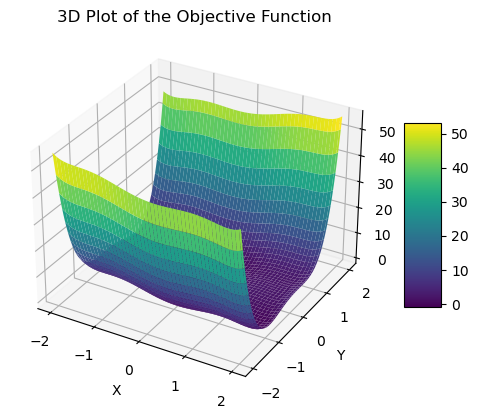

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x):
    return  (4 * x[0]**2 - 2.1 * x[0]**4 + (1/3) * x[0]**6 + x[0] * x[1] - 4 * x[1]**2 + 4 * x[1]**4)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = func([X, Y])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of the Objective Function')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


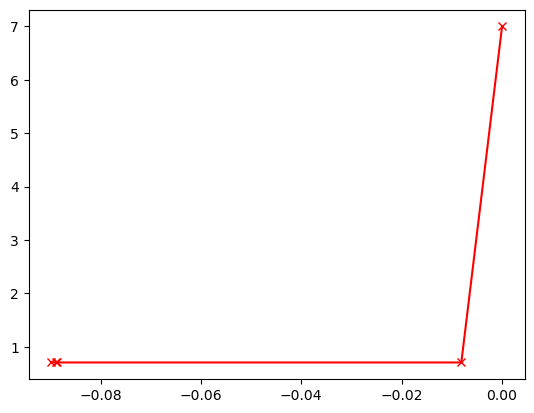

(array([-0.0898416 ,  0.71265641]), -1.0316284534891982)

In [68]:
rank_1(np.array([0.0, 7.0]), 10**-5)

### Rank One Method + Golden Section Search for Branin (p17)

In [26]:
def func(x): # Objective function 
    return (x[1] - (5.1/(4*au.pi**2))*x[0]**2 + (5/au.pi)*x[0] - 6)**2 + 10*(1 - 1/(8*au.pi))*au.cos(x[0]) + 10

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.show()
            plt.plot(x1, x2, "rx-", ms=5.5) 
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])


### Plot Branin

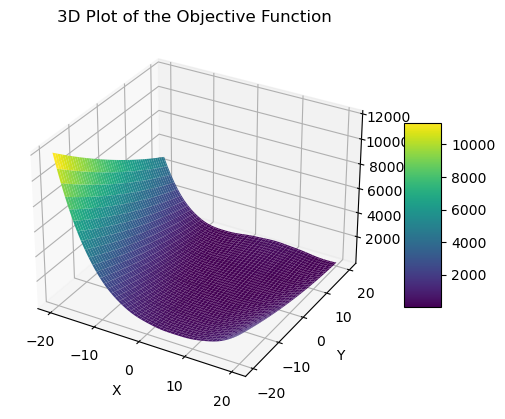

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x):
    return (x[1] - (5.1/(4*np.pi**2))*x[0]**2 + (5/np.pi)*x[0] - 6)**2 + 10*(1 - 1/(8*np.pi))*np.cos(x[0]) + 10

x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = func([X, Y])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of the Objective Function')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


(array([-3.14159265, 12.27499997]), 0.39788735772973816)

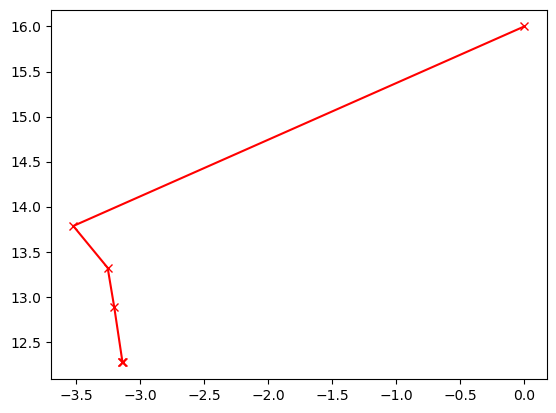

In [66]:
rank_1(np.array([0.0, 16.0]), 10**-5)

### Rank One Method + Golden Section Search for Goldstein-Price (p18)

In [47]:
def func(x): # Objective function
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2))*(30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])

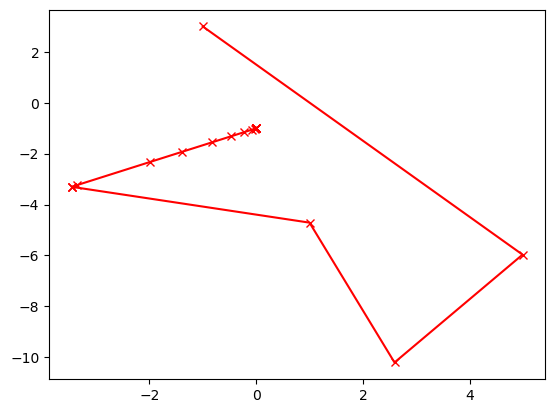

(array([ 3.14015251e-09, -1.00000000e+00]), 3.0000000000000675)

In [59]:
rank_1(np.array([-1.0, 3.0]), 10**-5)

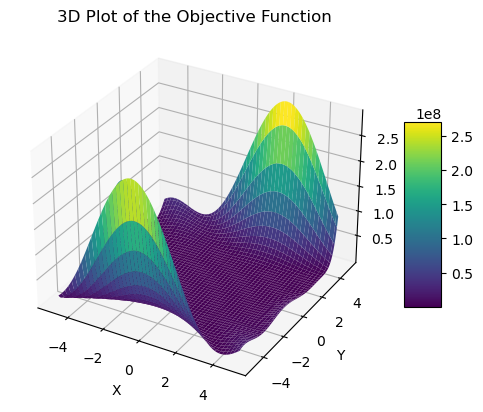

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2))*(30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = func([X, Y])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of the Objective Function')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


## Rank One Method + Golden Section Search for Sphere (p1)

In [29]:
n = 30
def func(x):
    return sum(x[i] ** 2 for i in range(1,n))

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])

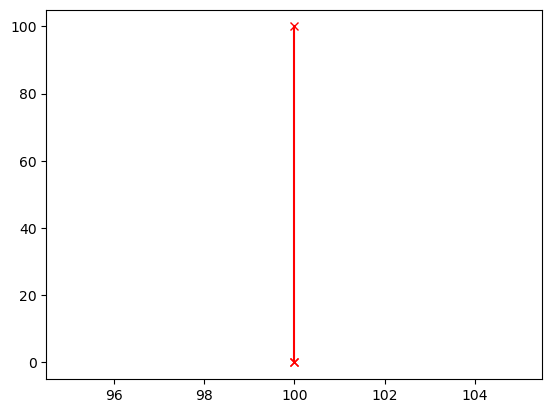

(array([ 1.00000000e+02, -3.82772738e-10, -3.82772738e-10, -3.82772738e-10,
        -3.82772738e-10, -3.82772738e-10, -3.82772738e-10, -3.82772738e-10,
        -3.82772738e-10, -3.82772738e-10, -3.82772738e-10, -3.82772738e-10,
        -3.82772738e-10, -3.82772738e-10, -3.82772738e-10, -3.82772738e-10,
        -3.82772738e-10, -3.82772738e-10, -3.82772738e-10, -3.82772738e-10,
        -3.82772738e-10, -3.82772738e-10, -3.82772738e-10, -3.82772738e-10,
        -3.82772738e-10, -3.82772738e-10, -3.82772738e-10, -3.82772738e-10,
        -3.82772738e-10, -3.82772738e-10]),
 4.248934090497169e-18)

In [30]:
rank_1(np.array([100.0]*30),10**-5)

### Plot Sphere

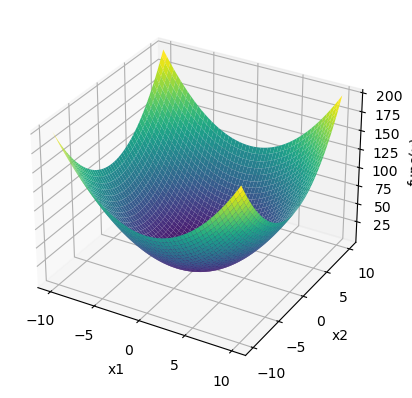

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 30

def func(x):
    return sum(x[i] ** 2 for i in range(n))

# Define the range for x1 and x2
x1 = np.linspace(-10, 10, 400)
x2 = np.linspace(-10, 10, 400)
x1, x2 = np.meshgrid(x1, x2)

# Evaluate the function on the grid
# Since we can only plot in 3D for two variables, we set the remaining variables to zero
Z = np.array([func([x1_val, x2_val] + [0]*(n-2)) for x1_val, x2_val in zip(x1.ravel(), x2.ravel())])
Z = Z.reshape(x1.shape)

# Plotting the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, Z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('func(x)')

plt.show()


### Rank One Method + Golden Section Search for Schwefel (p3)

In [74]:
def func(X):
    
    total_sum = 0
    n = len(X)
    
    for l in range(1, n + 1):
        prefix_sum = sum(X[:l])
        total_sum += prefix_sum ** 2
    
    return total_sum

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])

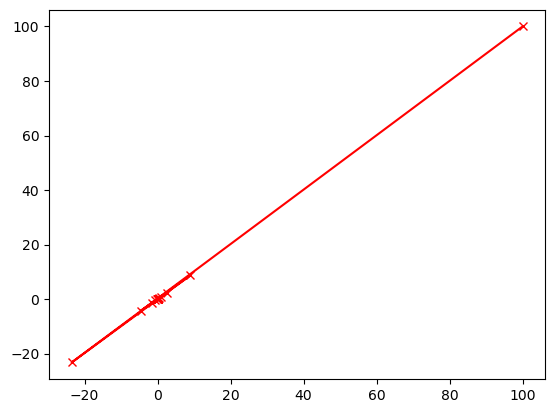

(array([ 6.36649250e-08,  4.71014199e-09, -1.28650670e-07, -7.70316373e-08,
         1.95258377e-07,  1.49817034e-07, -2.74126846e-07, -2.13831668e-07,
         3.82304519e-07,  2.47713438e-07, -5.40607311e-07, -2.03021451e-07,
         7.56899139e-07, -2.01279913e-08, -9.63711884e-07,  5.74961569e-07,
         8.48717448e-07, -1.45975714e-06,  3.53432652e-07,  1.51903351e-06,
        -2.69551893e-06,  2.64908340e-06, -1.85099651e-06,  9.88458242e-07,
        -4.14667387e-07,  1.37724713e-07, -3.60320828e-08,  7.29960340e-09,
        -1.10843195e-09,  1.18779366e-10]),
 7.896323001405706e-12)

In [75]:
rank_1(np.array([100.0]*30),10**-5)

### Plot Schwefel 

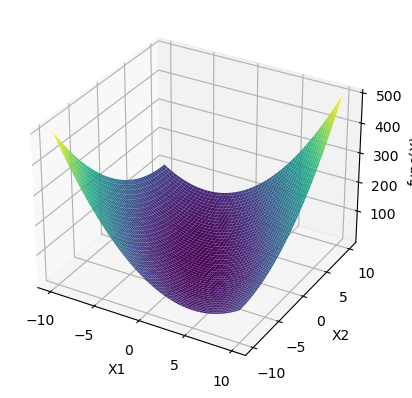

In [76]:
X1 = np.linspace(-10, 10, 400)
X2 = np.linspace(-10, 10, 400)
X1, X2 = np.meshgrid(X1, X2)

# Evaluate the function on the grid
Z = np.array([func([x1, x2]) for x1, x2 in zip(X1.ravel(), X2.ravel())])
Z = Z.reshape(X1.shape)

# Plotting the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('func(X)')

plt.show()

### Rank One Method + Golden Section Search for Rosenbrock (p5)

In [38]:
def func(X):
    
    total_sum = 0
    n = len(X)
    for i in range(n - 1):
        term1 = 100 * (X[i + 1] - X[i]**2)**2
        term2 = (X[i] - 1)**2
        total_sum += term1 + term2
    
    return total_sum

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])

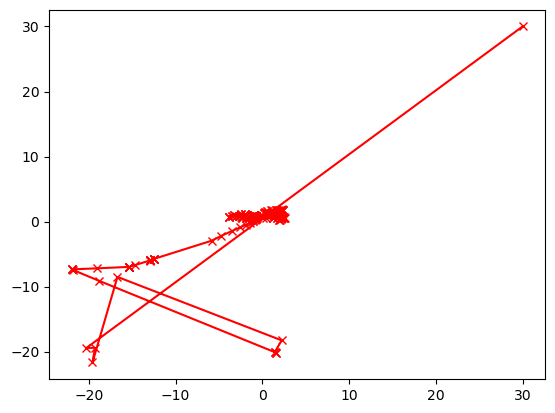

(array([-0.9932861 ,  0.99665107,  0.99833032,  0.99916774,  0.9995852 ,
         0.99979328,  0.99989698,  0.99994866,  0.99997442,  0.99998725,
         0.99999365,  0.99999683,  0.99999842,  0.99999921,  0.99999961,
         0.9999998 ,  0.9999999 ,  0.99999995,  0.99999998,  0.99999999,
         0.99999999,  1.        ,  1.        ,  1.        ,  1.        ,
         0.99999999,  0.99999999,  0.99999998,  0.99999997,  0.99999994]),
 3.9866238543009427)

In [39]:
rank_1(np.array([30.0]*30),10**-5)

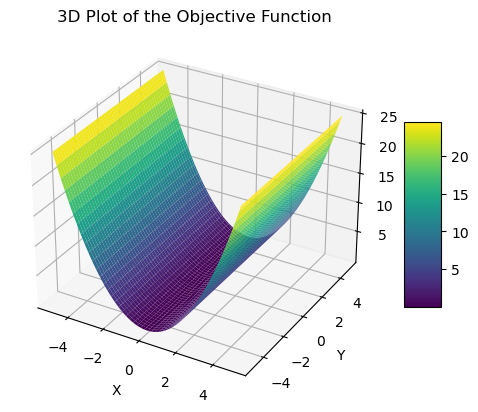

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x):
    return sum(x[i] ** 2 for i in range(len(x) - 1))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = func([X, Y])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of the Objective Function')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


### Rank One Method + Golden Section Search for Schwefel2.26 (p8)

In [98]:
def func(X):
    n=30
    total_sum = 0
    for i in range(1, n):
        total_sum -= X[i] * au.sin(au.sqrt(au.abs(X[i])))
    return total_sum

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])

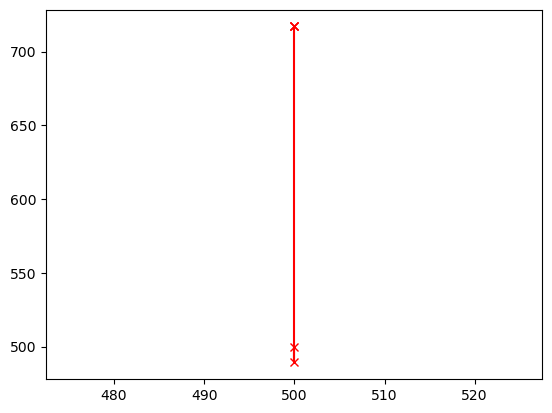

(array([500.        , 717.06594744, 717.06594744, 717.06594744,
        717.06594744, 717.06594744, 717.06594744, 717.06594744,
        717.06594744, 717.06594744, 717.06594744, 717.06594744,
        717.06594744, 717.06594744, 717.06594744, 717.06594744,
        717.06594744, 717.06594744, 717.06594744, 717.06594744,
        717.06594744, 717.06594744, 717.06594744, 717.06594744,
        717.06594744, 717.06594744, 717.06594744, 717.06594744,
        717.06594744, 717.06594744]),
 -20737.15400834167)

In [111]:
rank_1(np.array([500.0]*30),10**-5)

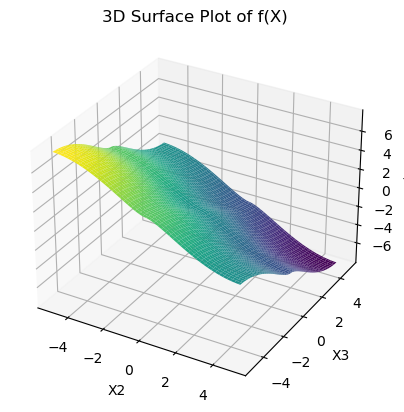

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(X):
    n = 30
    total_sum = 0
    for i in range(1, n):
        total_sum -= X[i] * np.sin(np.sqrt(np.abs(X[i])))
    return total_sum

# Generate data for plotting
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = func([0, X[i, j], Y[i, j]] + [0] * 28)  # Considering only X2 and X3 variables

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X2')
ax.set_ylabel('X3')
ax.set_zlabel('f(X)')
ax.set_title('3D Surface Plot of f(X)')

plt.show()


### Rank One Method + Golden Section Search for Rastrigin (p9)

In [82]:
import autograd.numpy
def func(X):
    n = len(X)
    total_sum = 0
    for xi in X:
        total_sum += xi**2 - 10 * autograd.numpy.cos(2 * autograd.numpy.pi * xi) + 10
    return total_sum

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])

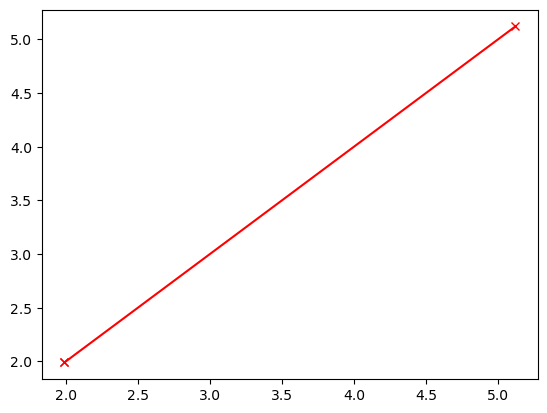

(array([1.98991223, 1.98991223, 1.98991223, 1.98991223, 1.98991223,
        1.98991223, 1.98991223, 1.98991223, 1.98991223, 1.98991223,
        1.98991223, 1.98991223, 1.98991223, 1.98991223, 1.98991223,
        1.98991223, 1.98991223, 1.98991223, 1.98991223, 1.98991223,
        1.98991223, 1.98991223, 1.98991223, 1.98991223, 1.98991223,
        1.98991223, 1.98991223, 1.98991223, 1.98991223, 1.98991223]),
 119.39493571662251)

In [83]:
rank_1(np.array([5.12]*30),10**-5)

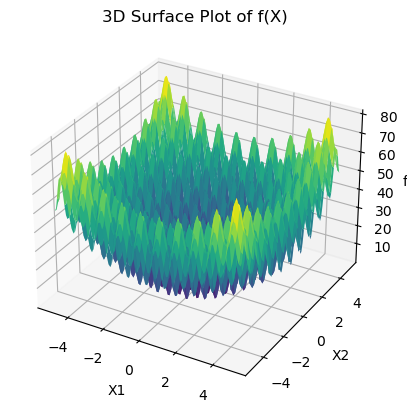

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(X):
    n = len(X)
    total_sum = 0
    for xi in X:
        total_sum += xi**2 - 10 * np.cos(2 * np.pi * xi) + 10
    return total_sum

# Generate data for plotting
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = func([X[i, j], Y[i, j]])

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X)')
ax.set_title('3D Surface Plot of f(X)')

plt.show()


### Rank One Method + Golden Section Search for Ackley (p10)

In [91]:
def func(X):
    n = len(X)
    sum1 = -20 * anp.exp(-0.2 * anp.sqrt(anp.sum(X**2))/n)
    sum2 = -anp.exp(anp.sum(anp.cos(2 * np.pi * X))/n)
    return sum1 + sum2 + 20 + anp.exp(1)

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])

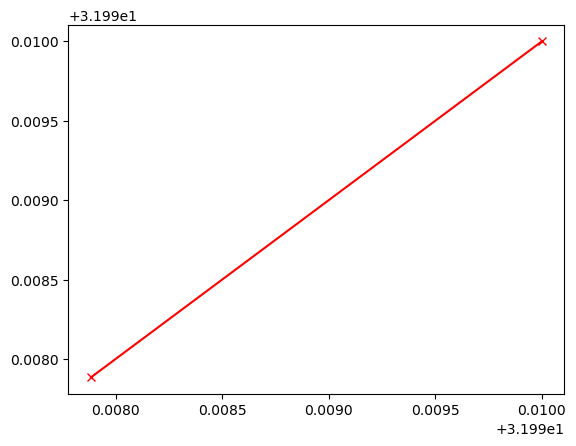

(array([31.99788423, 31.99788423, 31.99788423, 31.99788423, 31.99788423,
        31.99788423, 31.99788423, 31.99788423, 31.99788423, 31.99788423,
        31.99788423, 31.99788423, 31.99788423, 31.99788423, 31.99788423,
        31.99788423, 31.99788423, 31.99788423, 31.99788423, 31.99788423,
        31.99788423, 31.99788423, 31.99788423, 31.99788423, 31.99788423,
        31.99788423, 31.99788423, 31.99788423, 31.99788423, 31.99788423]),
 13.782946320120068)

In [90]:
rank_1(np.array([32.0]*30),10**-5)

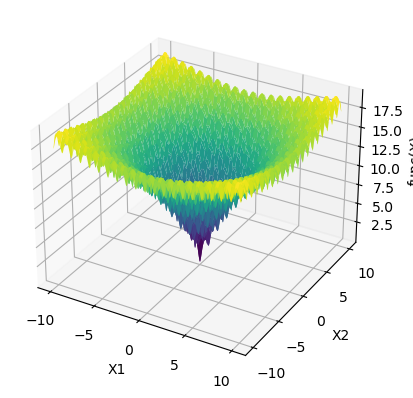

In [93]:
import numpy as np
import autograd.numpy as anp  # Import autograd numpy as anp for differentiation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(X):
    X = anp.array(X)  # Convert list to autograd numpy array
    n = len(X)
    sum1 = -20 * anp.exp(-0.2 * anp.sqrt(anp.sum(X**2)/n))
    sum2 = -anp.exp(anp.sum(anp.cos(2 * anp.pi * X))/n)
    return sum1 + sum2 + 20 + anp.exp(1)

# Define the range for X1 and X2
X1 = np.linspace(-10, 10, 400)
X2 = np.linspace(-10, 10, 400)
X1, X2 = np.meshgrid(X1, X2)

# Evaluate the function on the grid
Z = np.array([func([x1, x2]) for x1, x2 in zip(X1.ravel(), X2.ravel())])
Z = Z.reshape(X1.shape)

# Plotting the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('func(X)')

plt.show()


### Rank One Method + Golden Section Search for Griewank p(11)

In [8]:
def u(x, a, k, m):
    if x > a:
        return k * (x - a) ** m
    elif -a <= x <= a:
        return 0
    else:
        return k * (-x - a) ** m

def f(X):
    n = len(X)
    sum1 = 0
    for i in range(n):
        sum1 += 10 * np.sin(np.pi * X[0])**2
        if i < n - 1:
            sum1 += (X[i] - 1)**2 * (1 + 10 * np.sin(np.pi * X[i + 1])**2)
        else:
            sum1 += (X[i] - 1)**2
    sum2 = 0
    for i in range(n):
        sum2 += u(X[i], 10, 100, 4)
    return sum1 + sum2

Df = grad(func) # Gradient of the objective function

NORM = np.linalg.norm

def golden_section_search(f, a, b, tol=1e-5):
    GR = 0.618
    n = 0
    while n < 30:
        d = GR * (b - a)
        x1 = a + d
        x2 = b - d
        
        f1 = f(x1)
        f2 = f(x2)
        
        if f1 > f2:
            b = x1
        else:
            a = x2
        
        n += 1
        
        if abs(b - a) < tol:
            break
            
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj # Start point for step length selection 
        beta = golden_section_search(lambda b: func(start_point + b * delta), 0, 1) # Selecting the step length using golden section search
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): 
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])

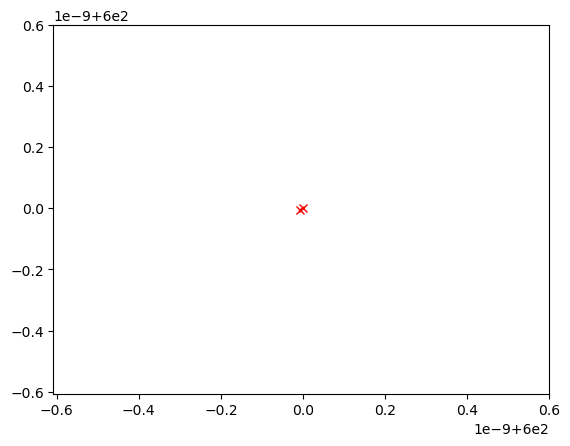

(array([600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600.,
        600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600.,
        600., 600., 600., 600., 600., 600., 600., 600.]),
 19.999999993888967)

In [9]:
rank_1(np.array([600.0]*30),10**-5)

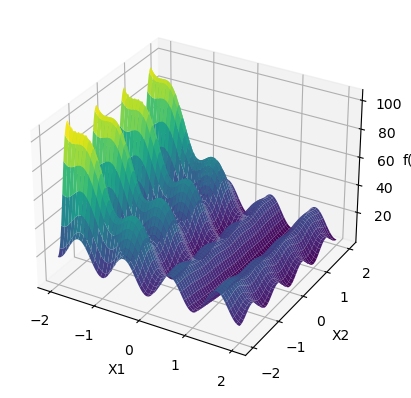

In [70]:
X1 = np.linspace(-2, 2, 400)
X2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(X1, X2)

# Evaluate the function on the grid
Z = np.array([f([x1, x2]) for x1, x2 in zip(X1.ravel(), X2.ravel())])
Z = Z.reshape(X1.shape)

# Plotting the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X)')

plt.show()

## Bi Section

### Rank One Method + Bi Section for Six-Hump Camel-Back (p16)

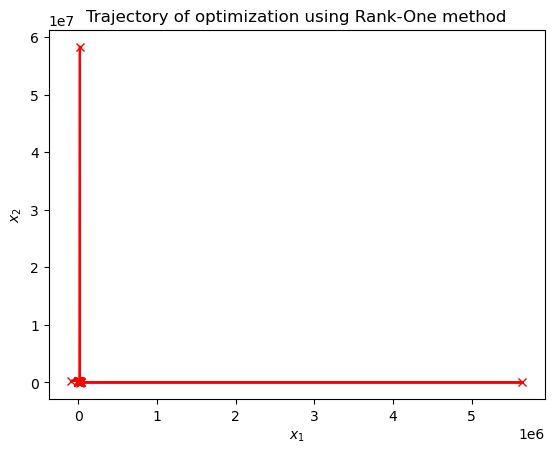

Optimal point: [-1.70360635  0.79608359]
Function value at optimal point: -0.2154638243824658
Number of iterations: 111


In [66]:
def func(X):  # Objective function
    return (4 * X[0]**2 - 2.1 * X[0]**4 + (1/3) * X[0]**6 + X[0] * X[1] - 4 * X[1]**2 + 4 * X[1]**4)

Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([0.0, 7.0])

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)


### Rank One Method + Bi Section for Branin (p17)

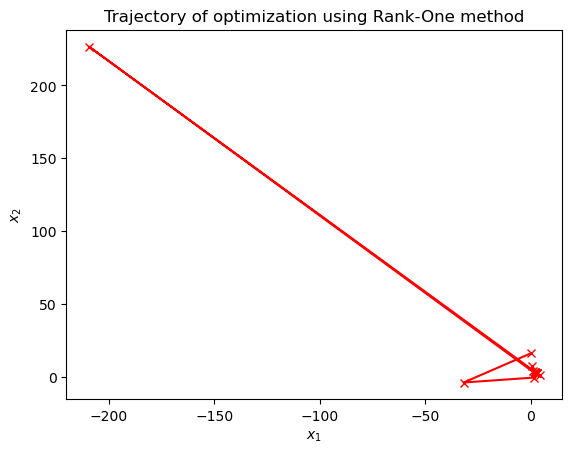

Optimal point: [3.14159265 2.275     ]
Function value at optimal point: 0.39788735772973816
Number of iterations: 14


In [112]:
def func(x): # Objective function
    return (x[1] - (5.1/(4*au.pi**2))*x[0]**2 + (5/au.pi)*x[0] - 6)**2 + 10*(1 - 1/(8*au.pi))*au.cos(x[0]) + 10

Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([0.0, 16.0])

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)


### Rank One Method + Bi Section for Branin (p18)

In [ ]:
def func(x): # Objective function
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2))*(30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([-1.0, 3.0])

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)


### Rank One Method + Bi Section for Sphere (p1)

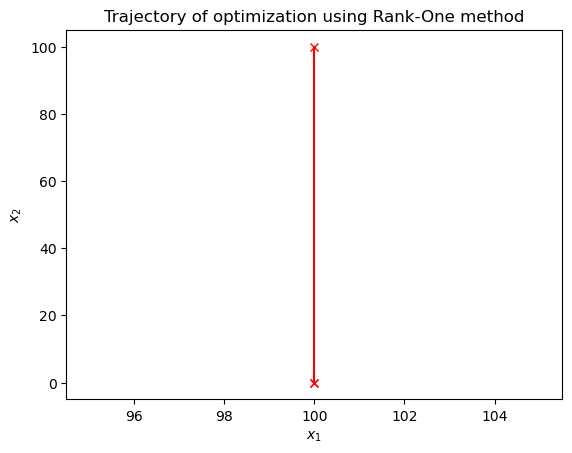

Optimal point: [1.00000000e+02 2.91038305e-09 2.91038305e-09 2.91038305e-09
 2.91038305e-09 2.91038305e-09 2.91038305e-09 2.91038305e-09
 2.91038305e-09 2.91038305e-09 2.91038305e-09 2.91038305e-09
 2.91038305e-09 2.91038305e-09 2.91038305e-09 2.91038305e-09
 2.91038305e-09 2.91038305e-09 2.91038305e-09 2.91038305e-09
 2.91038305e-09 2.91038305e-09 2.91038305e-09 2.91038305e-09
 2.91038305e-09 2.91038305e-09 2.91038305e-09 2.91038305e-09
 2.91038305e-09 2.91038305e-09]
Function value at optimal point: 2.456395546873388e-16
Number of iterations: 1


In [126]:
n = 30
def func(x):
    return sum(x[i] ** 2 for i in range(1,n))

Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([100.0]*30)

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)


### Rank One Method + Bi Section for Schwefel1.2 (p3)

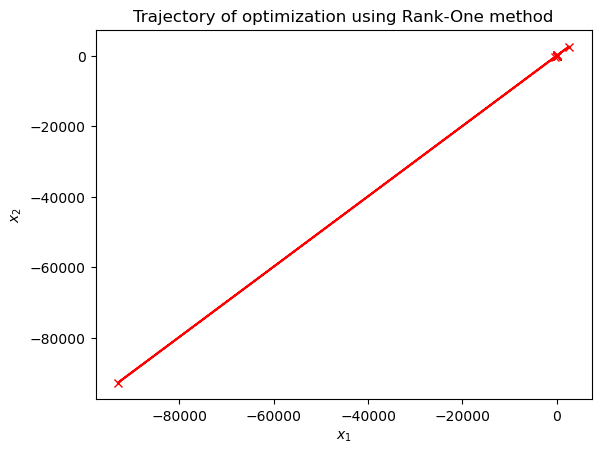

Optimal point: [-1.64133086e-07  1.99309576e-07  1.25302853e-07 -2.36288025e-07
 -7.44706261e-08  2.77784595e-07 -1.15568449e-09 -3.21524500e-07
  1.21045584e-07  3.53129286e-07 -3.11768094e-07 -3.29360416e-07
  5.95537330e-07  1.47435095e-07 -9.34309879e-07  3.76966376e-07
  1.05614938e-06 -1.35019532e-06 -1.75677059e-07  1.84745519e-06
 -2.13214990e-06  1.55205917e-06 -1.18807240e-06  8.93450069e-07
 -2.35732527e-07 -2.25117194e-07 -1.87723277e-08  3.03509601e-07
 -5.39788935e-10 -2.99783801e-07]
Function value at optimal point: 5.558616395020639e-12
Number of iterations: 20


In [127]:
def func(X):
    
    total_sum = 0
    n = len(X)
    
    for l in range(1, n + 1):
        prefix_sum = sum(X[:l])
        total_sum += prefix_sum ** 2
    
    return total_sum
Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([100.0]*30)

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)


### Rank One Method + Bi Section for Rosenbrock (p5)

In [ ]:
def func(X):
    
    total_sum = 0
    n = len(X)
    for i in range(n - 1):
        term1 = 100 * (X[i + 1] - X[i]**2)**2
        term2 = (X[i] - 1)**2
        total_sum += term1 + term2
    
    return total_sum
Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([30.0]*30)

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)


### Rank One Method + Bi Section for Schwefel2.26 (p8)

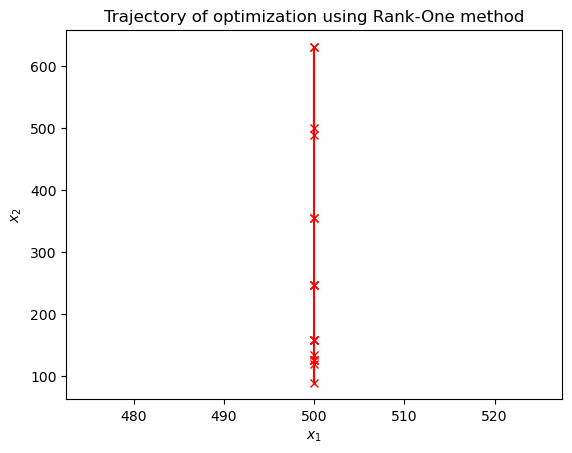

Optimal point: [500.         124.82935636 124.82935636 124.82935636 124.82935636
 124.82935636 124.82935636 124.82935636 124.82935636 124.82935636
 124.82935636 124.82935636 124.82935636 124.82935636 124.82935636
 124.82935636 124.82935636 124.82935636 124.82935636 124.82935636
 124.82935636 124.82935636 124.82935636 124.82935636 124.82935636
 124.82935636 124.82935636 124.82935636 124.82935636 124.82935636]
Function value at optimal point: 3563.4090319035613
Number of iterations: 16


In [129]:
def func(X):
    n=30
    total_sum = 0
    for i in range(1, n):
        total_sum -= X[i] * au.sin(au.sqrt(au.abs(X[i])))
    return total_sum

Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([500.0]*30)

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)


### Rank One Method + Bi Section for Rastrigin (p9)

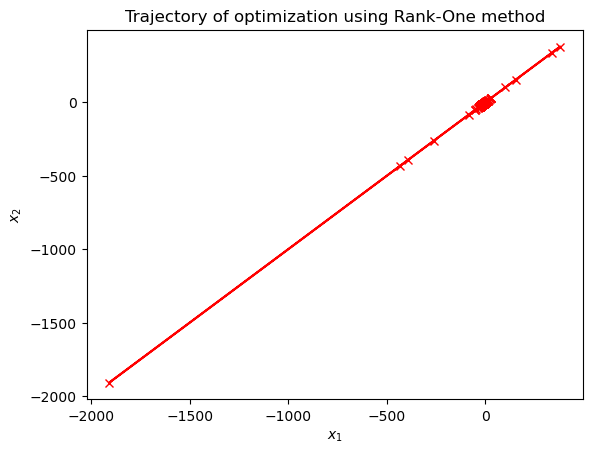

Optimal point: [ 3.51785914  3.51785914  3.51785914  3.51785914 -4.52299366 -4.52299366
 -4.52299366 -4.52299366 -5.96957278 -5.96957278 -5.96957278 -5.96957278
  8.54383571  8.54383571  8.54383571  8.54383571 -4.97469139 -4.97469139
 -4.97469139 -4.97469139 -3.97978386 -3.97978386 -3.97978386 -3.97978386
 16.90954329 16.90954329 16.90954329 16.90954329 10.55453054 26.83700885]
Function value at optimal point: 2973.4500428392084
Number of iterations: 812


In [130]:
import autograd.numpy
def func(X):
    n = len(X)
    total_sum = 0
    for xi in X:
        total_sum += xi**2 - 10 * autograd.numpy.cos(2 * autograd.numpy.pi * xi) + 10
    return total_sum

Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([5.12]*30)

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)


### Rank One Method + Bi Section for Ackley (p10)

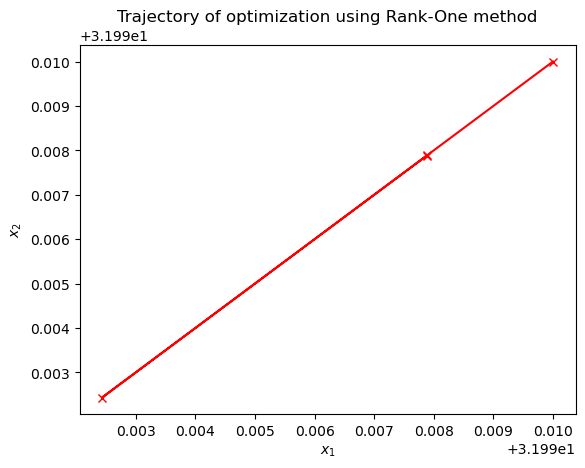

Optimal point: [31.99788424 31.99788424 31.99788424 31.99788424 31.99788424 31.99788424
 31.99788424 31.99788424 31.99788424 31.99788424 31.99788424 31.99788424
 31.99788424 31.99788424 31.99788424 31.99788424 31.99788424 31.99788424
 31.99788424 31.99788424 31.99788424 31.99788424 31.99788424 31.99788424
 31.99788424 31.99788424 31.99788424 31.99788424 31.99788424 31.99788424]
Function value at optimal point: 13.782946320120066
Number of iterations: 2


In [131]:
def func(X):
    n = len(X)
    sum1 = -20 * anp.exp(-0.2 * anp.sqrt(anp.sum(X**2))/n)
    sum2 = -anp.exp(anp.sum(anp.cos(2 * np.pi * X))/n)
    return sum1 + sum2 + 20 + anp.exp(1)

Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([32.0]*30)

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)


### Rank One Method + Bi Section for Griewank (p11)

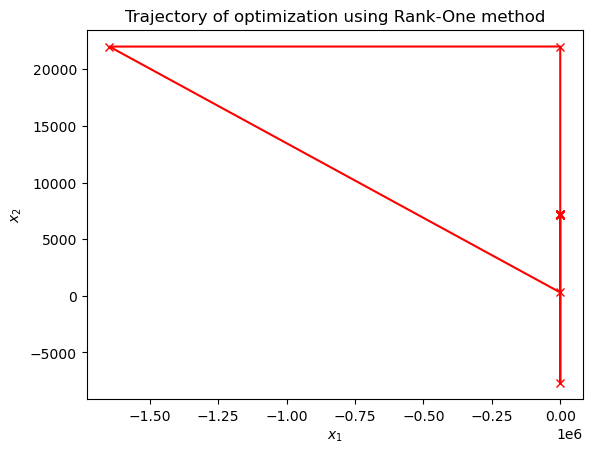

Optimal point: [ 241.90263429 7180.47499753  300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.        ]
Function value at optimal point: 0.3978873577297488
Number of iterations: 9


In [120]:
def u(x, a, k, m):
    if x > a:
        return k * (x - a) ** m
    elif -a <= x <= a:
        return 0
    else:
        return k * (-x - a) ** m

def f(X):
    n = len(X)
    sum1 = 0
    for i in range(n):
        sum1 += 10 * np.sin(np.pi * X[0])**2
        if i < n - 1:
            sum1 += (X[i] - 1)**2 * (1 + 10 * np.sin(np.pi * X[i + 1])**2)
        else:
            sum1 += (X[i] - 1)**2
    sum2 = 0
    for i in range(n):
        sum2 += u(X[i], 10, 100, 4)
    return sum1 + sum2
Df = grad(func)  # Gradient of the objective function
NORM = np.linalg.norm

def bisection_method(f, a, b, tol=1e-5):
    error = abs(b - a)
    while error >= tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        error = abs(b - a)
    return (a + b) / 2

def rank_1(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    iterations = 0
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) 
        
        start_point = Xj  # Start point for step length selection 
        beta = bisection_method(lambda b: func(start_point + b * delta), 0, 1) 
        # Selecting the step length using Bisection method
        
        X = Xj + beta * delta
        
        if NORM(Df(X)) < tol:
            x1.append(X[0])
            x2.append(X[1])
            # Plot the final collected data showing the trajectory of optimization
            plt.plot(x1, x2, "rx-", ms=5.5) 
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.title('Trajectory of optimization using Rank-One method')
            plt.show()
            return X, func(X), iterations
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj)) 
            W = np.outer(w, w) 
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8 * NORM(Gj) * NORM(w): 
                Bf += Delta          
            Xj = X  # Update to the new iterate
            x1.append(Xj[0])
            x2.append(Xj[1])
            iterations += 1

# Initial point
initial_point = np.array([300.0]*30)

# Tolerance
tolerance = 10**-5

# Run the optimization
result, func_value, iteration_count = rank_1(initial_point, tolerance)
print("Optimal point:", result)
print("Function value at optimal point:", func_value)
print("Number of iterations:", iteration_count)
